# introduction to convulutional neural networks and computer vision with tensorflow


Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car infront.

### Get the data

The images that we are working with are from the Food101 dataset (101 different classes of food dataset)

https://www.kaggle.com/datasets/dansbecker/food-101

However we have modified to use only two classes (pizza and steak) using the image_data_modification file
https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note** We start with smaller dataset so that we can experiment quickly and figure out what works (or better what doesnt works) before scaling

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-09-14 14:00:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 142.250.4.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  20.6MB/s    in 6.3s    

2023-09-14 14:00:55 (16.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data to become one with it

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for computer vision.. this usually means visualizing many samples of your data.


In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through the pizza steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

There are 2 directories and 0 images in 'pizza_steak
There are 2 directories and 0 images in 'pizza_steak/train
There are 0 directories and 750 images in 'pizza_steak/train/pizza
There are 0 directories and 750 images in 'pizza_steak/train/steak
There are 2 directories and 0 images in 'pizza_steak/test
There are 0 directories and 250 images in 'pizza_steak/test/pizza
There are 0 directories and 250 images in 'pizza_steak/test/steak


In [6]:
# Sometimes extra file in our directory comes which is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Sep 14 14:00 .
drwxr-xr-x 1 root root 4096 Sep 14 14:00 ..
drwxr-xr-x 4 root root 4096 Sep 14 14:00 test
drwxr-xr-x 4 root root 4096 Sep 14 14:00 train


In [7]:
# Another way to find out how many images are there in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize the our images, lets get the class names programmtically


In [8]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of classnames from subdirectories in the training folder
print(class_names)

['pizza' 'steak']


In [9]:
# Visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we will view images from here)
  target_folder = target_dir+target_class

  # Get the random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['2410138.jpg']
Image shape: (512, 512, 3)


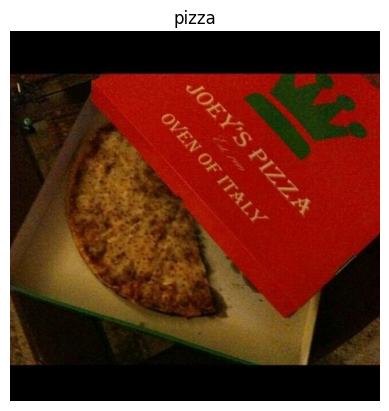

In [10]:
# View the random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [11]:
# The images we have imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>

In [12]:
# View the image shape
img.shape # returns height , width, color channels

(512, 512, 3)

In [13]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

## An end-to-end example

Lets build a convolutional neural network to find patterns in our images, more specifically, we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess the data (get all the pixel values between 0 & 1, also called normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), # common picture size used
                                               class_mode="binary",
                                               seed=42
                                               )
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
# Build a CNN Model (same as the tiny VGG on teh CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 22s 220ms/step - loss: 0.5901 - accuracy: 0.7060 - val_loss: 0.4063 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4313 - accuracy: 0.8133 - val_loss: 0.4002 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 6s 137ms/step - loss: 0.4267 - accuracy: 0.8080 - val_loss: 0.3784 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.3629 - accuracy: 0.8473 - val_loss: 0.3385 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3105 - accuracy: 0.8807 - val_loss: 0.3554 - val_accuracy: 0.8380


*Note* If the above cell is taking longer than -10 seconds per epoch, make sure you are using a GPU by going to Runtime -> Change Runtime Type -> Then choose GPU, you may have to rerun some cells above

In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before

Let's replicate the model we have built in a previous section to see if it works with our image data.

The model that we are building is from TensorFlow playground

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create the model replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))



Epoch 1/5
47/47 [==============================] - 8s 114ms/step - loss: 0.7423 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 130ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 110ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 141ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [18]:
# Get a summary of model 2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... lets try to improve it

In [19]:
# set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 114ms/step - loss: 1.8775 - accuracy: 0.6540 - val_loss: 0.5037 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 6s 138ms/step - loss: 0.8331 - accuracy: 0.6927 - val_loss: 0.6253 - val_accuracy: 0.7260
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.6583 - accuracy: 0.7293 - val_loss: 0.4404 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.5593 - accuracy: 0.7540 - val_loss: 0.4212 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4696 - accuracy: 0.7787 - val_loss: 0.4232 - val_accuracy: 0.8100


In [20]:
# get a summary of model 3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

#Binary Classification: Lets break it down:
1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step was here scaling/normalizing and turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. We adjust different parameters and improve the model (try to beat the baselne)
7. Repeat until satisfied (Experiment Experiment Experiment)

### Become one with the data

['3671021.jpg']
Image shape: (512, 512, 3)
['2534774.jpg']
Image shape: (512, 512, 3)


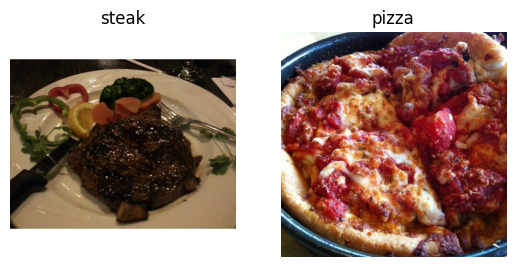

In [22]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### Preprocess the data (prepare it for a model)

In [23]:
# Define our directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all 10,000 images at one time, a model will look only 32 images per batch.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn patterns of 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
because 32 is good for your health.

In [24]:
!nvidia-smi

Thu Sep 14 14:05:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    29W /  70W |   2927MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directories of images
                                            target_size=(224, 224), # Target size of images (height, width)
                                            class_mode="binary",  # type of data you are working with
                                            batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get sample of train data batch
images, labels = train_data.next() # get the next batch of images/labels in train dat
len(images), len(labels)


(32, 32)

In [28]:
# How many batches are there
len(train_data)

47

In [29]:
1500/32

46.875

In [30]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [31]:
images[7].shape

(224, 224, 3)

In [32]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### Create a CNN Model (start with a baseline)

 A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline

 **Note**
 In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required. (e.g. look at which current model is performing best in the field for your problem).

In [33]:
# Make the creating of our model a little bit easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential




In [34]:
# Create the model (this will be our baseline, a 3 layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the steps the sliding window takes across an input
           padding="valid", # if "same", outut shape is same as input shape, if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), #input layer (specify input shape)

    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])



In [35]:
# Compile the model
model_4.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [36]:
# Get the summary of model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:

# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [38]:
# Fit the model
history_4 = model_4.fit(train_data, # this is the combination of labels and sample daa
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 9s 158ms/step - loss: 0.6348 - accuracy: 0.7167 - val_loss: 0.4576 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 6s 131ms/step - loss: 0.4428 - accuracy: 0.7887 - val_loss: 0.3776 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.3542 - accuracy: 0.8500 - val_loss: 0.4185 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.2130 - accuracy: 0.9247 - val_loss: 0.3695 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 6s 124ms/step - loss: 0.1072 - accuracy: 0.9633 - val_loss: 0.4777 - val_accuracy: 0.8060


In [39]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 89ms/step - loss: 0.3554 - accuracy: 0.8380


[0.3553720712661743, 0.8379999995231628]

In [40]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### Evaluating our model

It looks like our model is learning something, lets evaluate our model


<Axes: >

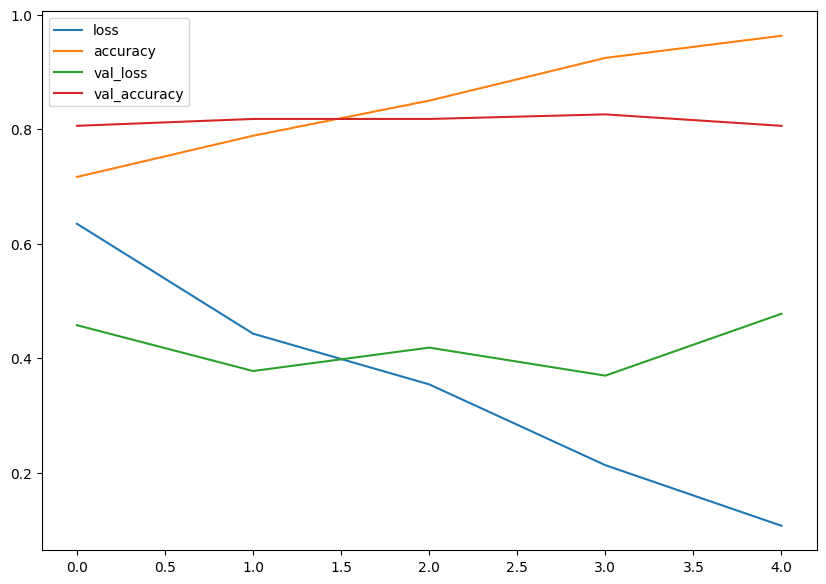

In [41]:
#Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))


In [42]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation methods

  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # How many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")



**Note** When a model's **validation_loss** starts to increase. Its likely that the model is overfitting in the training dataset. This means, its learning patterns in the training dataset **too well**. And thus the model's ability to generalize to unseen data will be diminished.

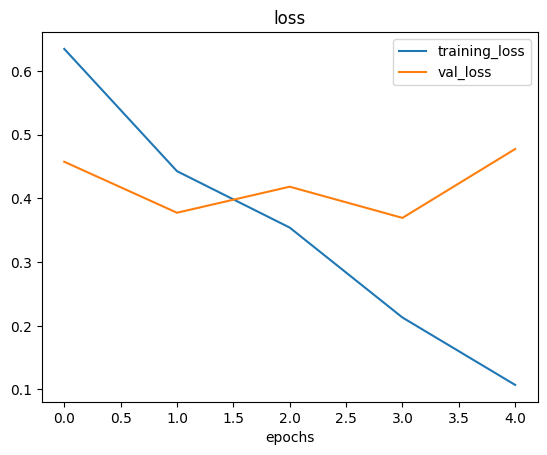

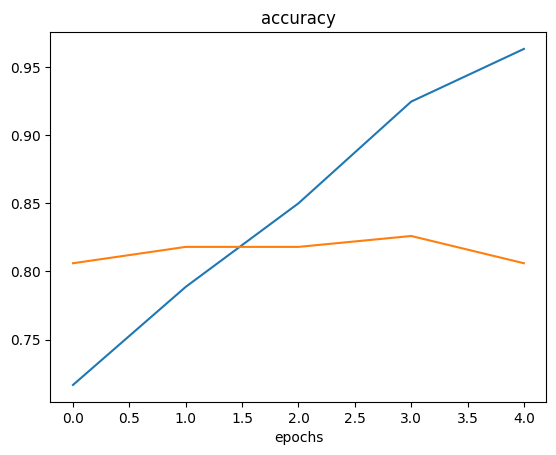

In [43]:
# check out the loss and accuracy of model_4
plot_loss_curves(history_4)

**Note**: Idealy the two loss curves (training and validation) will be similar to each other (decreasing at similar rates), when there are large differences your model may be overfitting

### 6. Adjust the Model parameters

fitting a machine learning model comes in 3 steps:
0. Create the baseline
1. Beat the baseline by iverfitting a larger model
2. Reduce Overfitting

Ways to induce overfitting!
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layers to the output of our flattened layer

Reduce Overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data ...

**Note** Reducing overfitting is also known as regularization.

In [44]:
# Create the model. This will be our new Baseline
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")

])

In [45]:
#  compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"]
                )

In [46]:
# Fit the model
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(valid_data)
            )

Epoch 1/5
47/47 [==============================] - 8s 131ms/step - loss: 0.6787 - accuracy: 0.5840 - val_loss: 0.6082 - val_accuracy: 0.6360
Epoch 2/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4756 - accuracy: 0.7833 - val_loss: 0.3661 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4167 - accuracy: 0.8260 - val_loss: 0.3458 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.4046 - accuracy: 0.8240 - val_loss: 0.3715 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 5s 116ms/step - loss: 0.3882 - accuracy: 0.8260 - val_loss: 0.3231 - val_accuracy: 0.8760


In [47]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

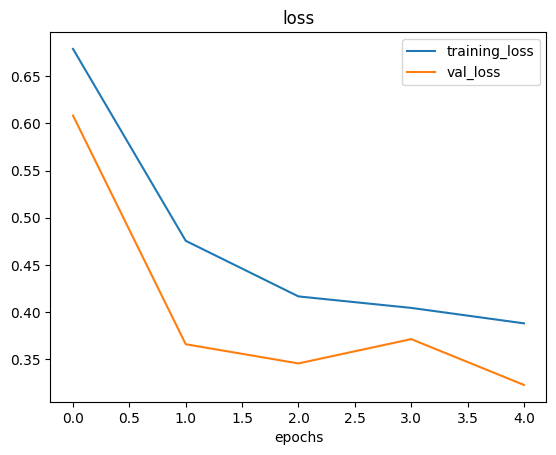

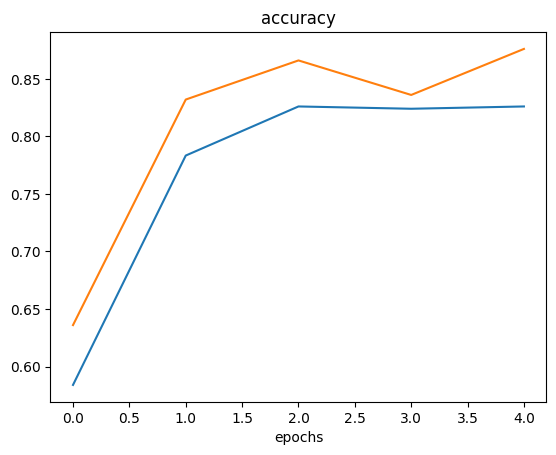

In [48]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [49]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmentation = ImageDataGenerator(rescale=1/255.,
                                                rotation_range=0.2, # how much do you want to rotate an image?
                                                shear_range=0.2, # how much do you want to shear an image?
                                                zoom_range=0.2, # zoom in randomly on an image
                                                width_shift_range=0.2, # move your image around on teh x-axis
                                                height_shift_range=0.2, # move your image aounrd on the y-axis
                                                horizontal_flip=True) # do you want to flip an image


# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)


# Create ImageDataGenerator without data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Question** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopeefully) patterns. Altering might mean adjusting rotation of an image, flipping it, cropping it, or something similar

Let's write some code to visualize data augmentation

In [50]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmentation.flow_from_directory(train_dir,
                                                                      target_size=(224, 224),
                                                                      batch_size=32,
                                                                      class_mode="binary",
                                                                      shuffle=False) # for demonstration purposes only
# create non augmented train data batches
print("Non Augmented training Data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non augmented test data
print("Non augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented training Data
Found 1500 images belonging to 2 classes.
Non augmented test data
Found 500 images belonging to 2 classes.


**Note** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` builtin data augmentation parameters our images are left as they are in the directories but are modified as they are loaded into the model.

Finally... let's visualize some augmented data

In [51]:
# Get some sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels are not augmented, only data

Showing image number: 31 


(-0.5, 223.5, 223.5, -0.5)

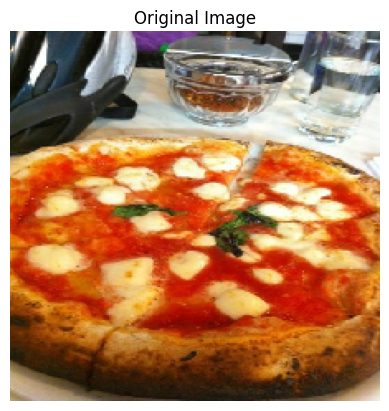

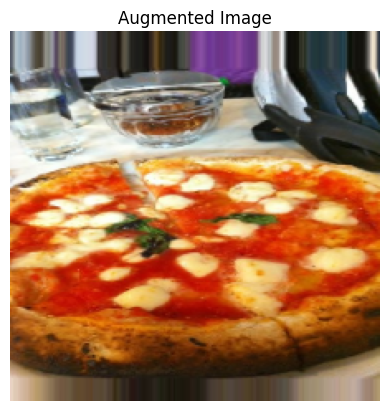

In [52]:
# Show th original image and the augmented image
import random
random_number = random.randint(0, 32)
print(f"Showing image number: {random_number} ")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

Now we have seen what augmented data looks like, lets build a model and see how it learns on augmented data.

In [53]:
# Create a model
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"]
                )

# Fit the model
history_6 = model_6.fit(train_data_augmented, # Fitting model 6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 24s 462ms/step - loss: 0.8682 - accuracy: 0.5887 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 22s 474ms/step - loss: 0.6931 - accuracy: 0.4967 - val_loss: 0.6901 - val_accuracy: 0.5420
Epoch 3/5
47/47 [==============================] - 21s 443ms/step - loss: 0.6907 - accuracy: 0.5220 - val_loss: 0.6819 - val_accuracy: 0.6120
Epoch 4/5
47/47 [==============================] - 22s 480ms/step - loss: 0.6898 - accuracy: 0.5467 - val_loss: 0.6754 - val_accuracy: 0.5980
Epoch 5/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6996 - accuracy: 0.5927 - val_loss: 0.6484 - val_accuracy: 0.6760


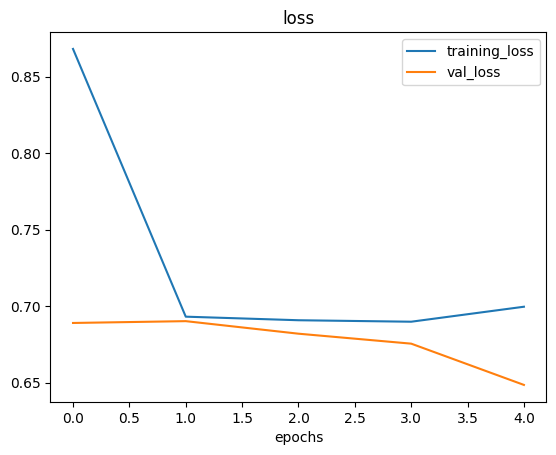

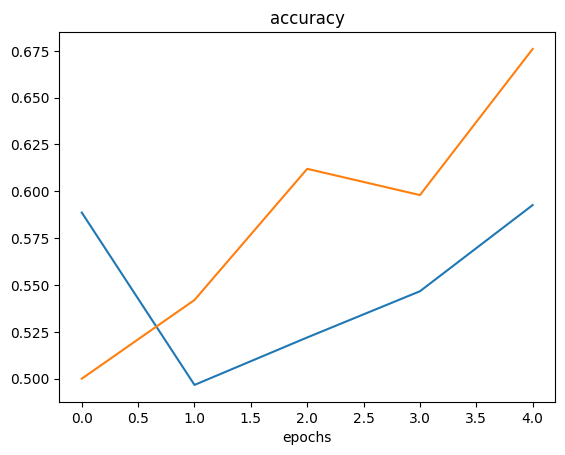

In [54]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our training data and our augmented training data
and train another model (same as before) on it and see what happens.

In [55]:
# import data nad augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmentation.flow_from_directory(train_dir,
                                                                               target_size=(224, 224),
                                                                               class_mode="binary",
                                                                               shuffle=True) # shuffle data this time


Found 1500 images belonging to 2 classes.


In [56]:
# Create the model
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we are fitting on shuffeld and augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 23s 454ms/step - loss: 0.6400 - accuracy: 0.6433 - val_loss: 0.5052 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 21s 438ms/step - loss: 0.5260 - accuracy: 0.7493 - val_loss: 0.4150 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 22s 478ms/step - loss: 0.5136 - accuracy: 0.7527 - val_loss: 0.4291 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 22s 475ms/step - loss: 0.4944 - accuracy: 0.7673 - val_loss: 0.3584 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4809 - accuracy: 0.7740 - val_loss: 0.3581 - val_accuracy: 0.8500


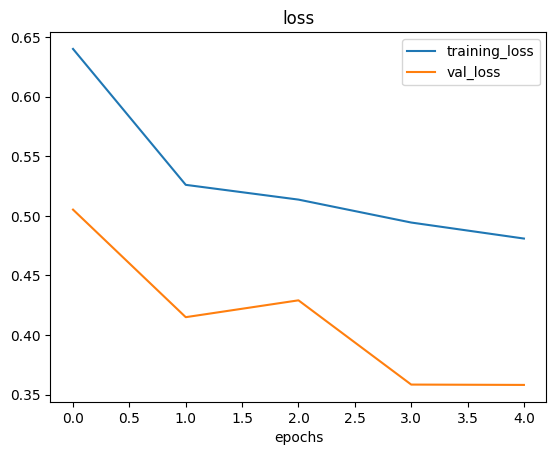

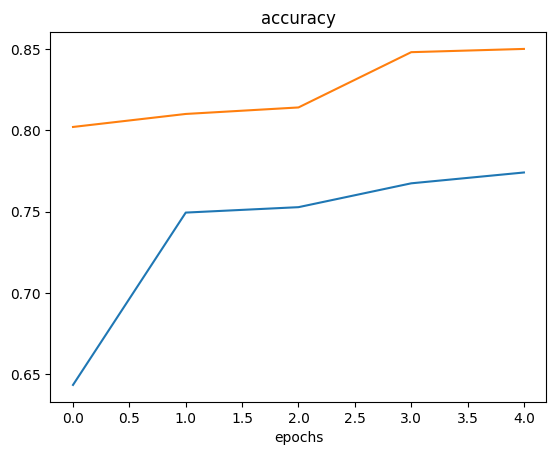

In [57]:
# Plot the loss curves
plot_loss_curves(history_7)

**Note** When shuffling data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza and steak at the same time instead of just pizza then steak)

### Step 7: Repeat untill satisfied

Since we have already beaten our baseline, there are few things we could try to continue to improve our model:

* Increase the number of model layers (e.g Cov2D / MaxPool2D)
* Increase the number  of filters in each conv layers (e.g we can go from 10 -> 32 or even maybe 64)
* train for longer (do 10 instead of 5)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case


### Making a prediction with our trained model on our own custom data

In [58]:
print(class_names)

['pizza' 'steak']


--2023-09-14 14:13:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2023-09-14 14:13:47 (207 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

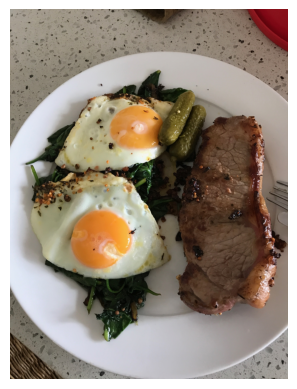

In [59]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)


In [60]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

**Note** When you train a neural network and you want to make a prediction with it on your own custom data, Its important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [61]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into tensor
  img = tf.image.decode_image(img, channels=3)

  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all the values between 0 and 1)
  img = img/255.
  return img



In [62]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [63]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 178ms/step


Looks like our custom image is being put through our model. However, it currently outputs a prediction probabilitym wouldnt be nice if we could visualzie the image as well as the model's predictions

In [64]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [65]:
# we can index the predicted class by rounding the prediction probability and indexing on class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [66]:
# Prediction function for Binary Classification
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and
  plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and the predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 19ms/step


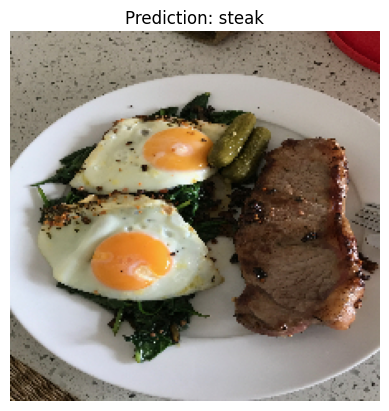

In [67]:
# Test our model on the custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image ... this time pizza

--2023-09-14 14:14:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-09-14 14:14:24 (264 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 19ms/step


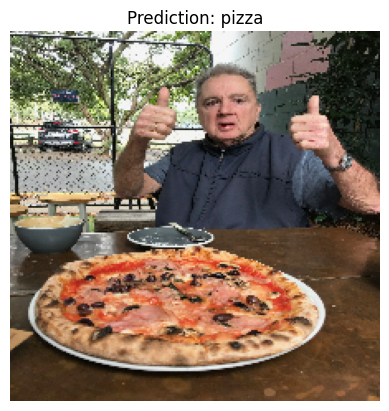

In [68]:
# Download test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multiclass Image Classification Problem

We have just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we are going to step things up a notch with 10 classes of food. (multi class classification)

1. Become one with the data
2. Preprocess the data (get it ready for the model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different type of parameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat untill satisfied


## 1. Import and become one with the data


In [69]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our dat
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-09-14 14:14:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  19.5MB/s    in 26s     

2023-09-14 14:14:58 (18.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [70]:
import os

# Walk through 10 classes food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [71]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [72]:
# Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3766099.jpg']
Image shape: (512, 512, 3)


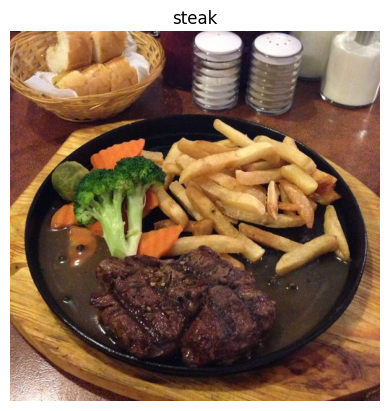

In [73]:
# Visualize Visualize Visualize
import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for the model)

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a Model (Start with a baseline)

We have been talking alot about CNN explainer website ... how about we just take
their model also on 10 classes and use it for our problem

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to our previous models but actually same as CNN Website model)

model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # changed to have 10 output neurons and use to have softmax function
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


### 4. Fit a model

In [76]:
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
235/235 [==============================] - 33s 132ms/step - loss: 2.1465 - accuracy: 0.2121 - val_loss: 1.9944 - val_accuracy: 0.2796
Epoch 2/5
235/235 [==============================] - 30s 127ms/step - loss: 1.9429 - accuracy: 0.3220 - val_loss: 1.9382 - val_accuracy: 0.3224
Epoch 3/5
235/235 [==============================] - 30s 127ms/step - loss: 1.7797 - accuracy: 0.3977 - val_loss: 1.8615 - val_accuracy: 0.3540
Epoch 4/5
235/235 [==============================] - 29s 124ms/step - loss: 1.4875 - accuracy: 0.5055 - val_loss: 2.0193 - val_accuracy: 0.3260
Epoch 5/5
235/235 [==============================] - 28s 121ms/step - loss: 0.9946 - accuracy: 0.6720 - val_loss: 2.3107 - val_accuracy: 0.3076


### 5. Evaluate the model

In [77]:
# Evaluate on test data
model_8.evaluate(test_data)

79/79 [==============================] - 7s 85ms/step - loss: 2.3107 - accuracy: 0.3076


[2.3107247352600098, 0.3075999915599823]

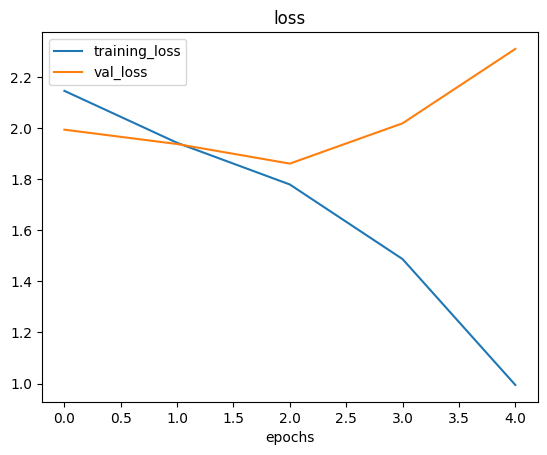

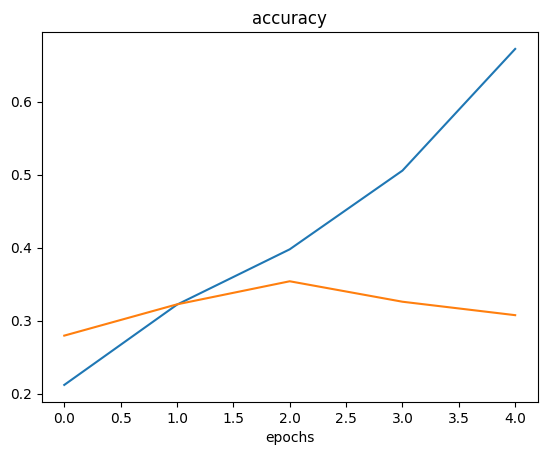

In [78]:
# Check out the model's loss curves on 10 classes
plot_loss_curves(history_8)

# Below the loss should go down with the training loss, idealyy bot should be nearly on same line, if training loss goes down then val loss should also go down
# So our model here is overfitting, its learning the patterns too well, as line goes up

# Same with below accuracy, but accuracy should go up

What do these loss curves tell us?

Well ... it seems our model is **overfitting** the training set quite badly,
in other words, its getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data set

### 6. Adjust the models hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on training data, its clear our model is learning something...

However, its not generalizing well to unseen data.

So lets try and fix overfitting by...

1. **Get more data** - having more data gives a model more opportunity to learn diverse patterns

2. **Simplify the model** - If our current model is overfitting the data, it may be too complicated for the model, one way to simplify a model is to: reduce number of layers or reduce number of hidden units in layers.

3. **Data Augmentation** - data augmentation manipulates the training dat in such a way to add more diversity to it (without altering the original data)

3. **Use transfer Learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset


In [79]:
# how about we try and simplify the model first?
# Lets try to remove 2 convulational layers

model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")

])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



In [80]:
# fit the model wth 2x times conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 30s 120ms/step - loss: 2.1097 - accuracy: 0.2424 - val_loss: 2.0082 - val_accuracy: 0.2888
Epoch 2/5
235/235 [==============================] - 28s 117ms/step - loss: 1.7756 - accuracy: 0.3991 - val_loss: 1.9996 - val_accuracy: 0.3020
Epoch 3/5
235/235 [==============================] - 29s 124ms/step - loss: 1.3855 - accuracy: 0.5449 - val_loss: 1.9722 - val_accuracy: 0.3072
Epoch 4/5
235/235 [==============================] - 28s 118ms/step - loss: 0.8701 - accuracy: 0.7328 - val_loss: 2.3380 - val_accuracy: 0.3120
Epoch 5/5
235/235 [==============================] - 28s 119ms/step - loss: 0.4777 - accuracy: 0.8673 - val_loss: 2.6820 - val_accuracy: 0.2940


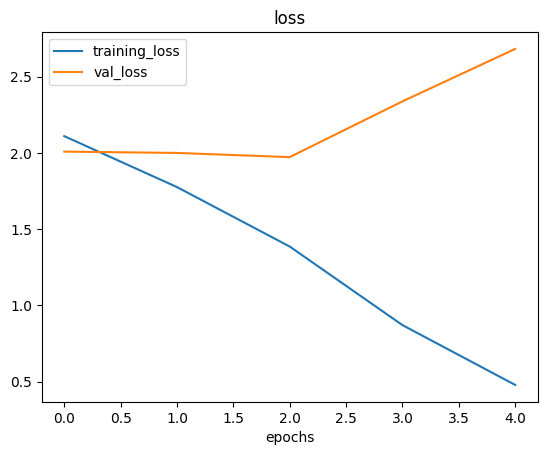

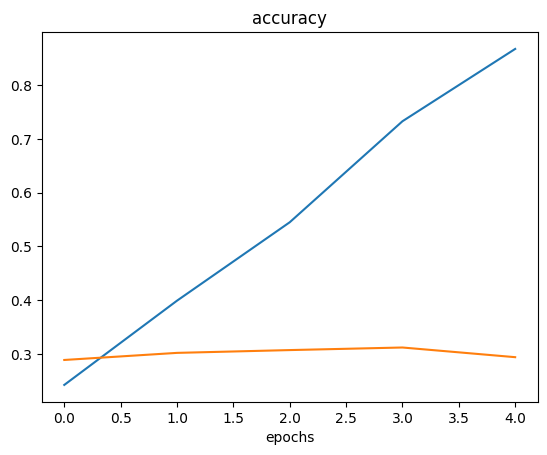

In [81]:
# check out the loss curves
plot_loss_curves(history_9)

In [82]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

In [83]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

Looks like our simplifying the model experiment didnt work ... accuracy went down and overfitting continue.

How about we try data augmentation


## Trying to reduce overfitting with data augmentation

Lets try and improve our models results by using augmented training data...

Ideally we want to:
* reduce overfitting (get the train and validation loss curve)
* Imrove validation accuracy


In [84]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True
                                             )

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode = "categorical"
                                               )

Found 7500 images belonging to 10 classes.


In [85]:
# Lets create another model but this time we will fit on augmented training data
model_10 = tf.keras.models.clone_model(model_8) # it takes the model 8 architecure but resets all the learned patterns

# Compile the cloned model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
                 )

In [86]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 111s 464ms/step - loss: 2.1979 - accuracy: 0.1807 - val_loss: 2.0040 - val_accuracy: 0.3028
Epoch 2/5
235/235 [==============================] - 112s 476ms/step - loss: 2.0716 - accuracy: 0.2659 - val_loss: 1.9349 - val_accuracy: 0.3288
Epoch 3/5
235/235 [==============================] - 110s 467ms/step - loss: 1.9941 - accuracy: 0.3061 - val_loss: 1.8474 - val_accuracy: 0.3572
Epoch 4/5
235/235 [==============================] - 110s 466ms/step - loss: 1.9364 - accuracy: 0.3309 - val_loss: 1.7594 - val_accuracy: 0.4040
Epoch 5/5
235/235 [==============================] - 108s 461ms/step - loss: 1.9123 - accuracy: 0.3413 - val_loss: 1.7701 - val_accuracy: 0.3964


In [87]:
model_8.evaluate(test_data)

79/79 [==============================] - 7s 83ms/step - loss: 2.3107 - accuracy: 0.3076


[2.310725450515747, 0.3075999915599823]

In [88]:
model_10.evaluate(test_data)

79/79 [==============================] - 7s 92ms/step - loss: 1.7701 - accuracy: 0.3964


[1.7701468467712402, 0.39640000462532043]

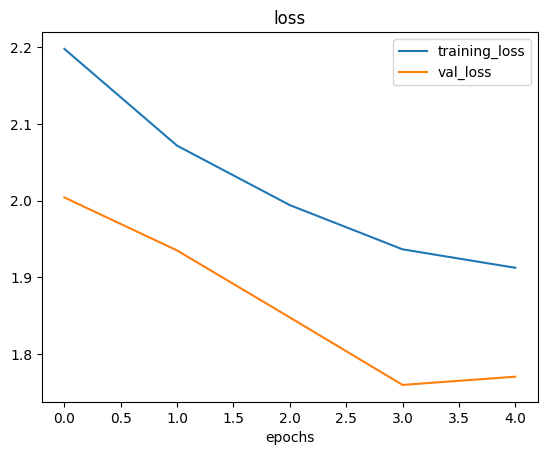

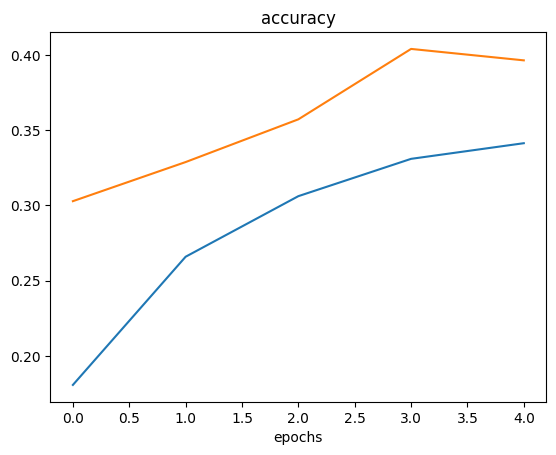

In [89]:
# Check out our model trained on augmented data's loss curves

plot_loss_curves(history_10)

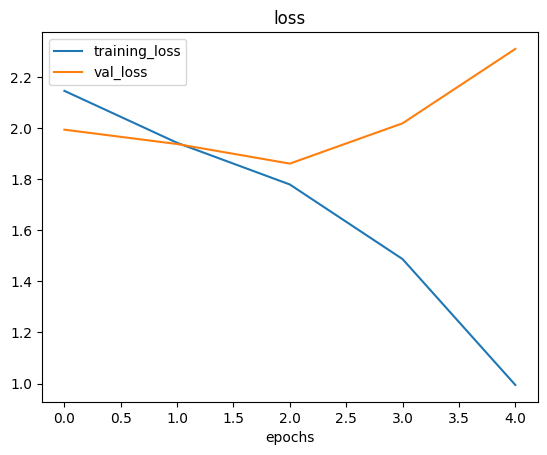

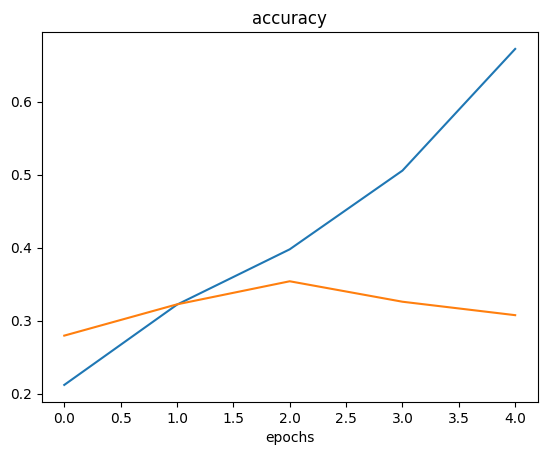

In [90]:
plot_loss_curves(history_8)

Woah that looks much better, the loss curves are much closer to each other than baseline model, and they look like they are heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see furthur improvements

### Repeat untill satisfied

We could keep going here.. continually to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

by running lots of experiments namely:
- restructuring our models architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- try training for longer (e:g 10 epochs instead of 5 epochs)
- try **transfer learning**

## Make a prediction with our trained model

Lets use our trained model to make some predictions on our own custom images

In [91]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [92]:
# Download some custom images
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

--2023-09-14 14:32:46--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15715 (15K) [text/plain]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]  15.35K  --.-KB/s    in 0.001s  

2023-09-14 14:32:47 (13.1 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [15715/15715]

--2023-09-14 14:32:47--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15705 (15K) [text/plain]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]  15.34K  --.-KB/s    in 0.001s  

2023-09-14 14:32:47 (10.1 MB/s) - ‘03-hamburger.jpeg’ saved

In [95]:
# Reconfig pred_and_plot for multiclass classification

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred)]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 19ms/step


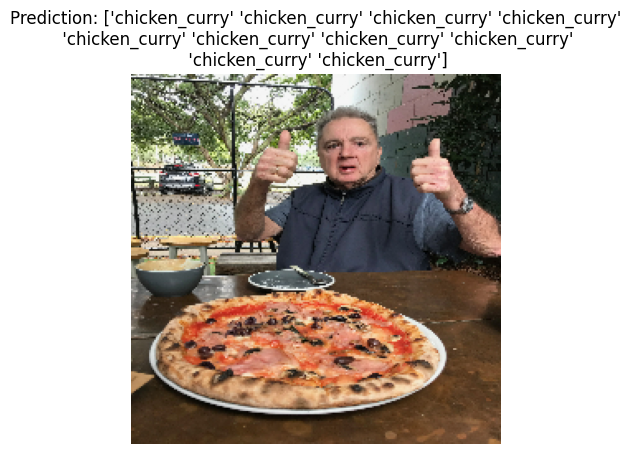

In [96]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename='03-pizza-dad.jpeg',
              class_names=class_names)

1/1 [==============================] - 0s 26ms/step


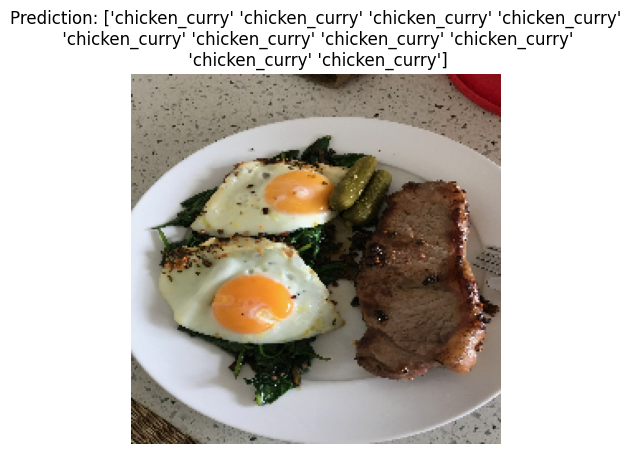

In [97]:
pred_and_plot(model=model_10,
              filename='03-steak.jpeg',
              class_names=class_names)

In [99]:
pred_and_plot(model=model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)

InvalidArgumentError: ignored